# Real Estate Prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action = 'ignore')

### Importing Dataset 

In [2]:
dataset = pd.read_csv("dataset.csv")

### Data Exploration 

In [3]:
dataset.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [4]:
dataset.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                      float64
Latitude                                     float64
Longitude                                    f

In [5]:
dataset.shape

(21613, 21)

In [6]:
dataset.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

#### Treating Outliers

In [8]:
dataset['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

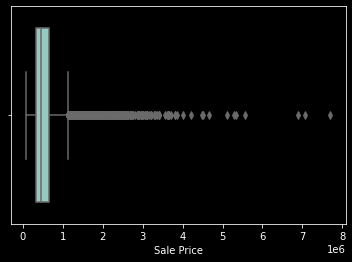

In [9]:
import seaborn as sns
sns.boxplot(x=dataset['Sale Price'])

In [10]:
q1 = dataset['Sale Price'].quantile(0.25)
q3 = dataset['Sale Price'].quantile(0.75)

In [11]:
iqr = q3-q1
iqr

323050.0

In [12]:
upper_limit = q3+iqr*1.5
lower_limit = q1-1.5*iqr
upper_limit, lower_limit

(1129575.0, -162625.0)

In [13]:
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return upper_limit
    else:
        return value

In [14]:
dataset['Sale Price'] = dataset['Sale Price'].apply(limit_imputer)

#### Treating Missing Values 

In [15]:
dataset.dropna(inplace=True, axis=0, subset=['Sale Price'])

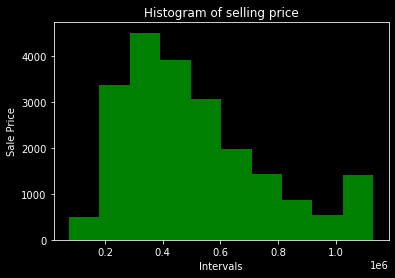

In [16]:
plt.hist(dataset['Sale Price'], bins=10, color='green')
plt.xlabel('Intervals')
plt.ylabel('Sale Price')
plt.title('Histogram of selling price')
plt.show()

In [17]:
numerical_columns = ['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)',
                    'Area of the House from Basement (in Sqft)','Latitude','Longitude','Living Area after Renovation (in Sqft)']

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
dataset[numerical_columns]=imputer.fit_transform(dataset[numerical_columns])

In [19]:
dataset['Zipcode'].shape

(21609,)

In [20]:
column = dataset['Zipcode'].values.reshape(-1,1)
column.shape

(21609, 1)

In [21]:
imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
dataset['Zipcode'] = imputer.fit_transform(column)

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

#### Treating Independent Numerical Variable 

In [23]:
dataset['Zipcode'] = dataset['Zipcode'].astype(object)

In [24]:
dataset.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                       object
Latitude                                     float64
Longitude                                    f

In [25]:
dataset['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [26]:
mapping={'None':"0",
        'Twice':'2',
        'Once':'1',
        'Thrice':'3',
        'Four':'4'}
dataset['No of Times Visited'] = dataset['No of Times Visited'].map(mapping)

In [27]:
dataset['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

In [28]:
dataset['Ever Renovated'] = np.where(dataset['Renovated Year'] == 0, 'No','Yes')

In [29]:
dataset['Purchased Year'] = pd.DatetimeIndex(dataset['Date House was Sold']).year

In [30]:
dataset['Years Since Renovation'] = np.where(dataset['Ever Renovated']=='Yes', abs(dataset['Purchased Year']-dataset['Renovated Year']),0)

#### Correlation 

In [31]:
dataset.drop(columns=['ID']).corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Purchased Year,Years Since Renovation
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.680914,0.606527,0.307513,-0.064306,0.122021,0.402430,0.045401,0.629944,0.092325,-0.003395,0.065907
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.349223,0.477549,0.303294,-0.154113,0.018861,-0.008708,0.129569,0.391771,0.029264,0.009924,-0.007198
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.635638,0.685088,0.283798,-0.505954,0.050761,0.024570,0.223171,0.568568,0.087226,0.026435,0.003551
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.705725,0.876226,0.435142,-0.318146,0.055380,0.052538,0.240091,0.756185,0.183223,0.029064,0.023503
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.102314,0.183492,0.015252,-0.053119,0.007634,-0.085719,0.229449,0.144507,0.718527,-0.005548,0.013835
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.461368,0.524031,-0.245572,-0.489244,0.006376,0.049692,0.125620,0.280106,-0.011204,0.022572,-0.000901
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,1.000000,0.705153,0.145232,-0.456711,0.010436,0.111226,0.201736,0.681362,0.107581,0.030950,-0.024388
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.705153,1.000000,-0.051825,-0.423848,0.023308,-0.000819,0.343793,0.731996,0.194106,0.023752,0.010491
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.435142,0.015252,-0.245572,0.145232,-0.051825,1.000000,0.133072,0.071328,0.110451,-0.144822,0.200302,0.017263,0.015567,0.029158
Age of House (in Years),-0.064306,-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,-0.456711,-0.423848,0.133072,1.000000,0.224861,0.148083,-0.409515,-0.326307,-0.071016,0.003353,0.203375


In [32]:
dataset.drop(columns = 'ID', inplace=True)

#### Treating Independent Categorical Variables 

In [33]:
dataset['Condition of the House'].head(10)

0         Fair
1         Fair
2         Fair
3    Excellent
4         Fair
5         Fair
6         Fair
7         Fair
8         Fair
9         Fair
Name: Condition of the House, dtype: object

In [34]:
dataset['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

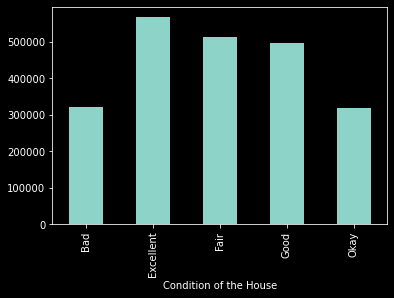

In [35]:
dataset.groupby('Condition of the House',)['Sale Price'].mean().plot(kind = 'bar')

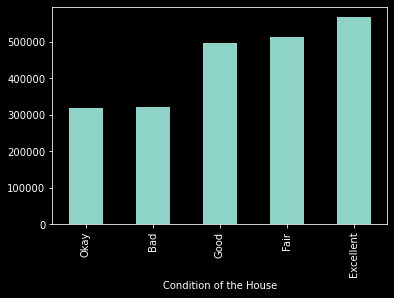

In [36]:
dataset.groupby('Condition of the House',)['Sale Price'].mean().sort_values().plot(kind = 'bar')

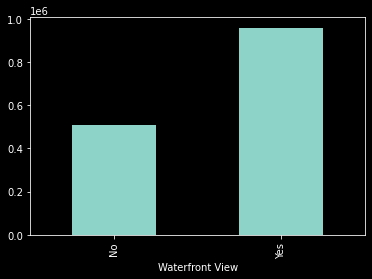

In [37]:
dataset.groupby('Waterfront View',)['Sale Price'].mean().sort_values().plot(kind = 'bar')

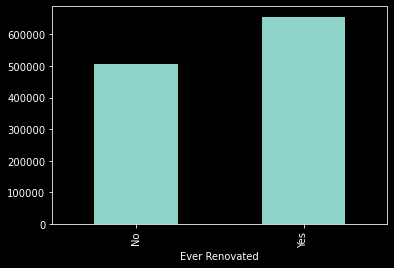

In [38]:
dataset.groupby('Ever Renovated',)['Sale Price'].mean().sort_values().plot(kind = 'bar')

**ANOVA** - Tells us does the Categorical Varibale have an impact on the target variable or not. But it is to be noted that t does not tell how strong or weak the impact is.

In [39]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [40]:
dataset = dataset.rename(columns={'Sale Price':'Sale_Price',
                                 'Condition of the House':'Condition_of_the_House',
                                 'Ever Renovated':'Ever_Renovated',
                                 'Waterfront View':'Waterfront_View'})

In [41]:
mod = ols('Sale_Price~Condition_of_the_House', data = dataset).fit()

In [42]:
Anova_Table = sm.stats.anova_lm(mod, typ=2)

In [43]:
print(Anova_Table)

                              sum_sq       df         F        PR(>F)
Condition_of_the_House  1.441831e+13      4.0  58.25563  5.447605e-49
Residual                1.336752e+15  21604.0       NaN           NaN


Since 'p' value is less than 0.05 we reject the Null Hypothesis and accept the Alternate Hyposthesis which means that the 'Means' are different and the categorical variable does make an impact on the target varibale

In [44]:
mod = ols('Sale_Price~Waterfront_View', data = dataset).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
Waterfront_View,3.283737e+13,1.0,538.192683,1.275558e-117
Residual,1.318333e+15,21607.0,NaN,NaN


In [45]:
mod = ols('Sale_Price~Ever_Renovated', data = dataset).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
Ever_Renovated,1.998463e+13,1.0,324.378469,5.419055e-72
Residual,1.331185e+15,21607.0,NaN,NaN


In [46]:
mod = ols('Sale_Price~Zipcode', data = dataset).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
Zipcode,6.859657e+14,69.0,321.902033,0.0
Residual,6.652044e+14,21539.0,NaN,NaN


Since in all the categorical variables the 'p' value is less than 0.05 we reject the Null Hypothesis

#### Creating Dummy Variables 

In [47]:
dataset = pd.get_dummies(dataset, columns=['Condition_of_the_House', 'Waterfront_View','Ever_Renovated'],drop_first=True)

In [48]:
dataset['Zipcode'].unique()

array([98178.0, 98125.0, 98028.0, 98136.0, 98074.0, 98053.0, 98003.0,
       98198.0, 98146.0, 98038.0, 98007.0, 98115.0, 98107.0, 98126.0,
       98019.0, 98103.0, 98002.0, 98133.0, 98040.0, 98092.0, 98030.0,
       98119.0, 98112.0, 98052.0, 98027.0, 98117.0, 98058.0, 98001.0,
       98056.0, 98166.0, 98023.0, 98070.0, 98148.0, 98105.0, 98042.0,
       98008.0, 98059.0, 98122.0, 98144.0, 98004.0, 98005.0, 98034.0,
       98075.0, 98116.0, 98010.0, 98118.0, 98199.0, 98032.0, 98045.0,
       98102.0, 98077.0, 98108.0, 98168.0, 98177.0, 98065.0, 98029.0,
       98006.0, 98109.0, 98022.0, 98033.0, 98155.0, 98024.0, 98011.0,
       98031.0, 98106.0, 98072.0, 98188.0, 98014.0, 98055.0, 98039.0],
      dtype=object)

Since Zipcode have 70 unique values so instead of making dummy variables for 70 different values, we'll 'bin' these levels into fewer groups before creating dummy variables.We'll bin Zipcode with similar average sales price into groups.

In [49]:
Zip_Table = dataset.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price', ascending=True)
Zip_Table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [50]:
Zip_Table['Zipcode_Groups'] = pd.cut(Zip_Table['Sale_Price'], bins = 10,
                                    labels = ['Zipcode_Group_0',
                                             'Zipcode_Group_1',
                                             'Zipcode_Group_2',
                                             'Zipcode_Group_3',
                                             'Zipcode_Group_4',
                                             'Zipcode_Group_5',
                                             'Zipcode_Group_6',
                                             'Zipcode_Group_7',
                                             'Zipcode_Group_8',
                                             'Zipcode_Group_9'],
                                    include_lowest = True)

In [51]:
Zip_Table = Zip_Table.drop(columns='Sale_Price')

In [52]:
dataset = pd.merge(dataset,
                  Zip_Table,
                  left_on='Zipcode',
                  how='left',
                  right_index = True)

In [53]:
dataset = dataset.drop(columns = 'Zipcode')

In [54]:
dataset = pd.get_dummies(dataset, columns=['Zipcode_Groups'],drop_first=True)

In [55]:
dataset.head()

,Date House was Sold,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Ever_Renovated_Yes,Zipcode_Groups_Zipcode_Group_1,Zipcode_Groups_Zipcode_Group_2,Zipcode_Groups_Zipcode_Group_3,Zipcode_Groups_Zipcode_Group_4,Zipcode_Groups_Zipcode_Group_5,Zipcode_Groups_Zipcode_Group_6,Zipcode_Groups_Zipcode_Group_7,Zipcode_Groups_Zipcode_Group_8,Zipcode_Groups_Zipcode_Group_9
0,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1,0,1,0,0,0,0,0,0,0
2,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,0,0,1,0,0,0,0,0,0,0
3,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,0,0,0,1,0,0,0,0,0,0
4,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,0,0,0,0,1,0,0,0,0,0


In [56]:
dataset.columns

Index(['Date House was Sold', 'Sale_Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'No of Times Visited', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'Purchased Year',
       'Years Since Renovation', 'Condition_of_the_House_Excellent',
       'Condition_of_the_House_Fair', 'Condition_of_the_House_Good',
       'Condition_of_the_House_Okay', 'Waterfront_View_Yes',
       'Ever_Renovated_Yes', 'Zipcode_Groups_Zipcode_Group_1',
       'Zipcode_Groups_Zipcode_Group_2', 'Zipcode_Groups_Zipcode_Group_3',
       'Zipcode_Groups_Zipcode_Group_4', 'Zipcode_Groups_Zipcode_Group_5',
       'Zipcode_Groups_Zipcode_Group_6', 'Zipcode_Groups_Zipcode_Group_7',
       'Zipcode_Groups_Zipcode_Group_8', 'Zipcod

In [57]:
dataset = dataset.drop(columns = 'Purchased Year')

In [58]:
dataset = dataset.drop(columns = 'Renovated Year')

In [59]:
dataset = dataset.drop(columns = 'Date House was Sold')

In [60]:
X = dataset.iloc[:,1:]
Y = dataset.iloc[:,0]

In [61]:
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Ever_Renovated_Yes,Zipcode_Groups_Zipcode_Group_1,Zipcode_Groups_Zipcode_Group_2,Zipcode_Groups_Zipcode_Group_3,Zipcode_Groups_Zipcode_Group_4,Zipcode_Groups_Zipcode_Group_5,Zipcode_Groups_Zipcode_Group_6,Zipcode_Groups_Zipcode_Group_7,Zipcode_Groups_Zipcode_Group_8,Zipcode_Groups_Zipcode_Group_9
0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,...,0,0,0,0,0,0,0,0,0,0
1,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,...,1,0,1,0,0,0,0,0,0,0
2,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,...,0,0,1,0,0,0,0,0,0,0
3,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,...,0,0,0,1,0,0,0,0,0,0
4,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,...,0,0,0,0,1,0,0,0,0,0


### Feature Scaling 

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = dataset['Sale_Price']
X = scaler.fit_transform(dataset.drop(columns = ['Sale_Price']))
X = pd.DataFrame(data = X, columns = dataset.drop(columns = ['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Ever_Renovated_Yes,Zipcode_Groups_Zipcode_Group_1,Zipcode_Groups_Zipcode_Group_2,Zipcode_Groups_Zipcode_Group_3,Zipcode_Groups_Zipcode_Group_4,Zipcode_Groups_Zipcode_Group_5,Zipcode_Groups_Zipcode_Group_6,Zipcode_Groups_Zipcode_Group_7,Zipcode_Groups_Zipcode_Group_8,Zipcode_Groups_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


### Checking and Removing Multicollinearity 

In [63]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Ever_Renovated_Yes,Zipcode_Groups_Zipcode_Group_1,Zipcode_Groups_Zipcode_Group_2,Zipcode_Groups_Zipcode_Group_3,Zipcode_Groups_Zipcode_Group_4,Zipcode_Groups_Zipcode_Group_5,Zipcode_Groups_Zipcode_Group_6,Zipcode_Groups_Zipcode_Group_7,Zipcode_Groups_Zipcode_Group_8,Zipcode_Groups_Zipcode_Group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,0.018573,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,0.050282,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,0.055111,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.007736,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,0.006297,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.104051,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,0.010010,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,0.023202,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,0.070969,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.225182,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


In [64]:
## pair of independent variables with correlation greater than 0.5
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

### Calculating VIF 

In [65]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Years Since Renovation                          2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

In [66]:
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

In [67]:
def MC_remover(dataset):
  vif = pd.Series([variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])], index = dataset.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    dataset = dataset.drop(columns = [vif[vif == vif.max()].index[0]])
    return dataset
  else:
    print('No Multicollinearity present anymore')
    return dataset

In [68]:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Ever_Renovated_Yes,Zipcode_Groups_Zipcode_Group_1,Zipcode_Groups_Zipcode_Group_2,Zipcode_Groups_Zipcode_Group_3,Zipcode_Groups_Zipcode_Group_4,Zipcode_Groups_Zipcode_Group_5,Zipcode_Groups_Zipcode_Group_6,Zipcode_Groups_Zipcode_Group_7,Zipcode_Groups_Zipcode_Group_8,Zipcode_Groups_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


#### Remaining Columns 

In [69]:
# Calculating VIF for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Years Since Renovation                       2.788064
 Condition_of_the_House_Excellent             1.206487
 Condition_of_the_House_Good                  1.251488
 Condition_of_the_House_Okay                  1.025386
 Waterfront_View_Yes                          1.208288
 Ever_Reno

### Splitting the dataset into train and test set 

In [70]:
X = vif_data
Y = dataset['Sale_Price']

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

### Linear Regression 

In [72]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

In [73]:
lr.coef_

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14239.3533334 ,   5095.97603572,
        -2296.64888137,  10761.77007875,  14594.33847962,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051])

In [74]:
predictions = lr.predict(x_test)

In [75]:
lr.score(x_test, y_test)

0.8461987715586199

### 1. Residuals 

In [76]:
residuals = predictions - y_test

residual_table = pd.DataFrame({'residuals':residuals,
                    'predictions':predictions})
residual_table = residual_table.sort_values( by = 'predictions')

In [77]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

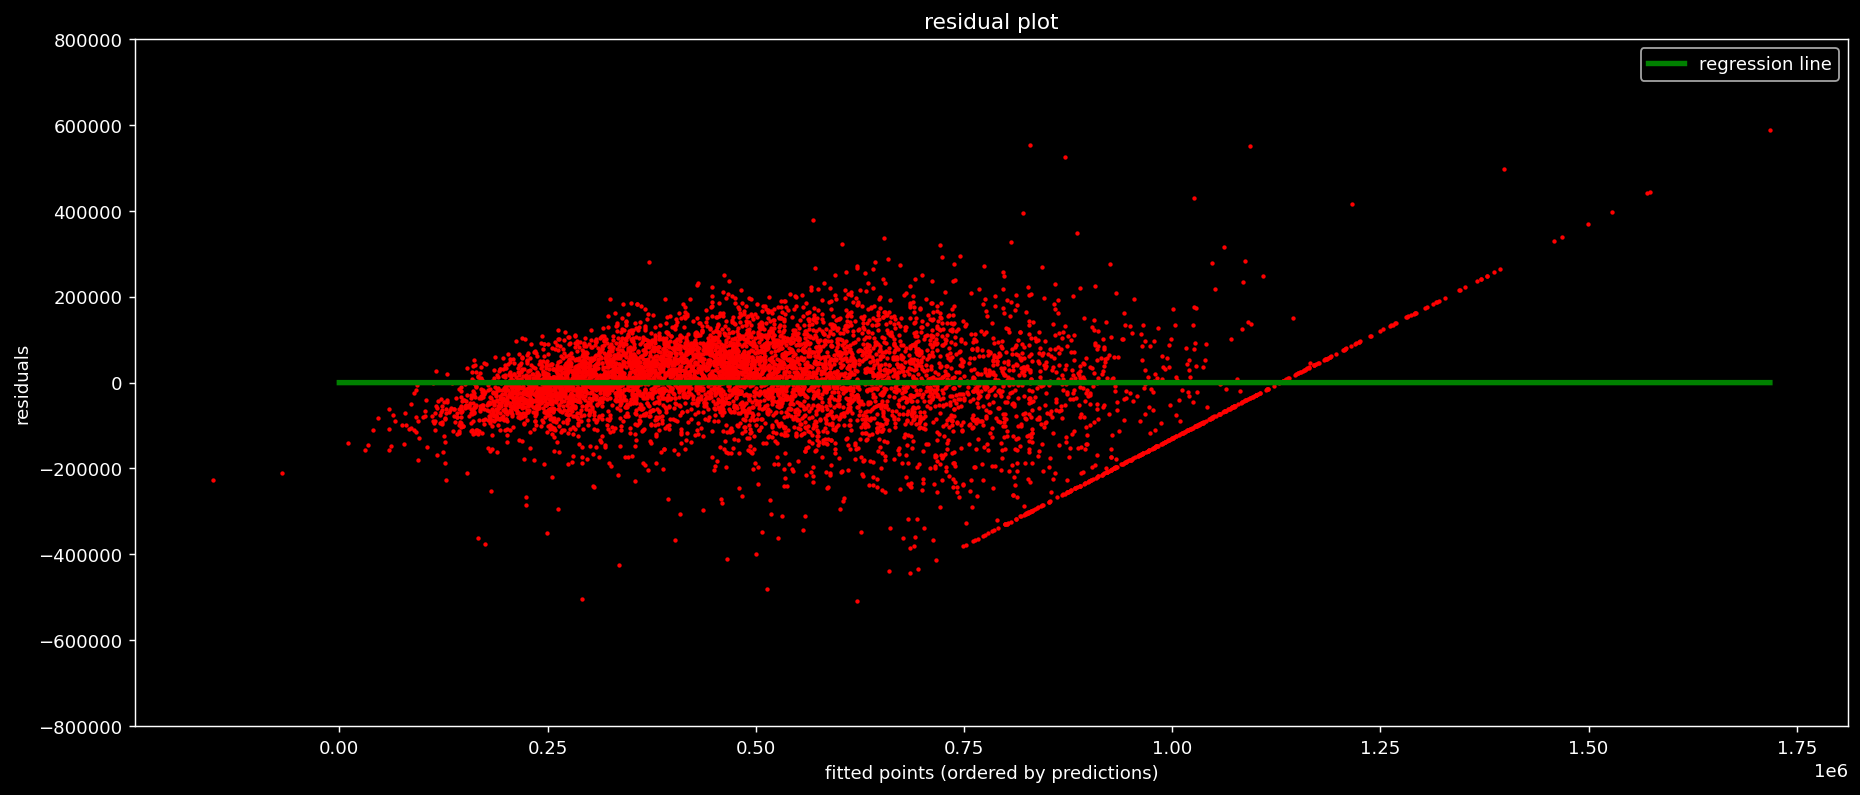

In [78]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

### 2. Distribution of errors 

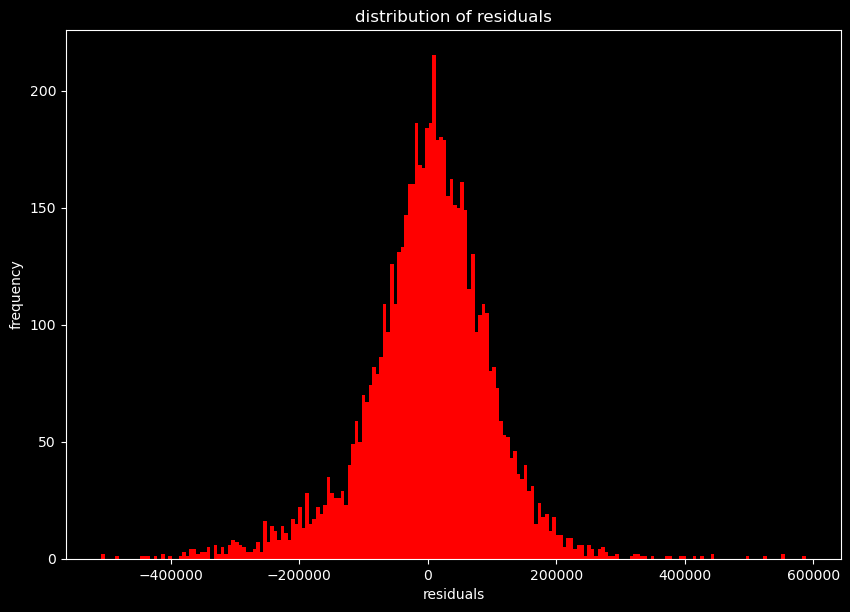

In [79]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

### Model Coefficients 

In [80]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')

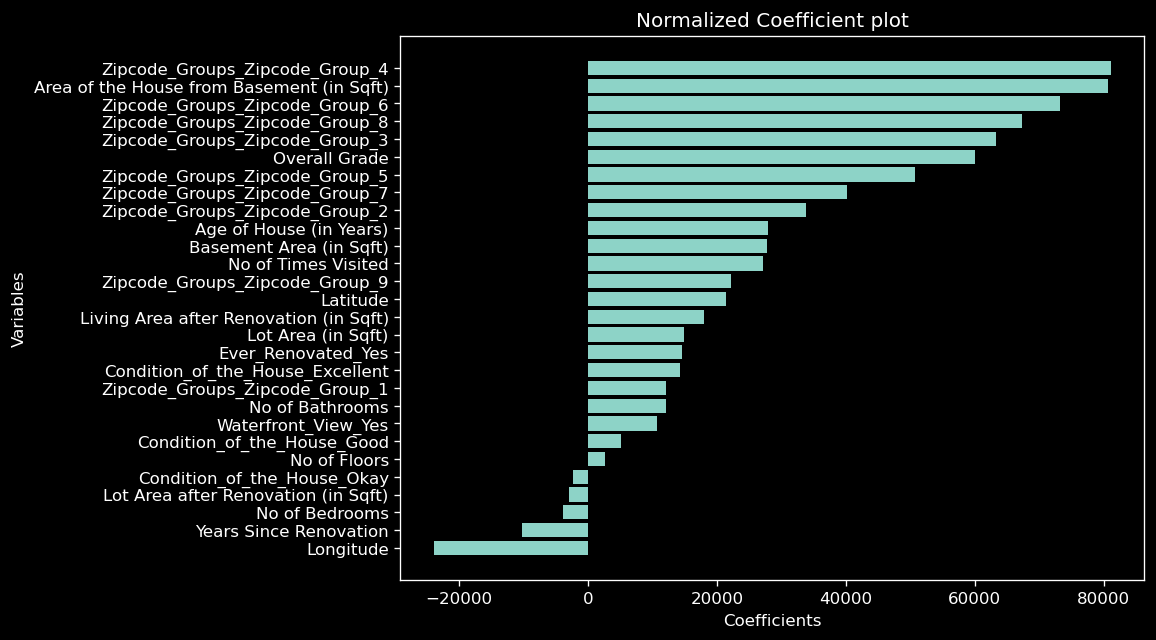

In [81]:
plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()